### Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import scipy as loadmata

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#from sklearn import datasets

#from nolearn.dbn import DBN

import os

from PIL import Image

### Change working dir and output its content

In [2]:
## work directory setting
os.chdir("/Users/ybeaz/")
arr = os.listdir()
#print('content of work directory:')
#print(arr)

### import MNIST from local files

In [5]:
from tensorflow.contrib.learn.python.learn.datasets.mnist import extract_images, extract_labels

with open('/Users/ybeaz/DevData/train-images-idx3-ubyte.gz', 'rb') as f:
  x_train = extract_images(f)
with open('/Users/ybeaz/DevData/train-labels-idx1-ubyte.gz', 'rb') as f:
  y_train = extract_labels(f)
with open('/Users/ybeaz/DevData/t10k-images-idx3-ubyte.gz', 'rb') as f:
  x_test = extract_images(f)
with open('/Users/ybeaz/DevData/t10k-labels-idx1-ubyte.gz', 'rb') as f:
  y_test = extract_labels(f)

print ('')
print ("Number of images for training:", x_train.shape[0])
print ("Number of images used for testing:", x_test.shape[0])
pix = int(np.sqrt(x_train.shape[1]))
print ("Each image is:", pix, "by", pix, "pixels")

Extracting /Users/ybeaz/DevData/train-images-idx3-ubyte.gz
Extracting /Users/ybeaz/DevData/train-labels-idx1-ubyte.gz
Extracting /Users/ybeaz/DevData/t10k-images-idx3-ubyte.gz
Extracting /Users/ybeaz/DevData/t10k-labels-idx1-ubyte.gz

Number of images for training: 60000
Number of images used for testing: 10000
Each image is: 5 by 5 pixels


### Show first image

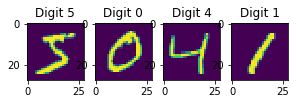

In [6]:
plt.figure(figsize=(12,10))
x, y = 10, 4

for i in range(4):
    
    label = y_train[i]
    plt.subplot(y, x, i+1).set_title('Digit {label}'.format(label=label))
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
    
plt.show()
    

In [7]:
from mlxtend.data import loadlocal_mnist
X, y = loadlocal_mnist(
        images_path='/Users/ybeaz/DevData/train-images.idx3-ubyte', 
        labels_path='/Users/ybeaz/DevData/train-labels.idx1-ubyte')


#plt.plot(x, x*1.5, label='Normal')
#print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
#print('\n1st row', X[0])

### mnist_cnn.py


In [8]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 2 #12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 494s 8ms/step - loss: 0.2600 - acc: 0.9199 - val_loss: 0.0644 - val_acc: 0.9785
Epoch 2/2
60000/60000 [==============================] - 593s 10ms/step - loss: 0.0883 - acc: 0.9742 - val_loss: 0.0372 - val_acc: 0.9875
Test loss: 0.03723623039675877
Test accuracy: 0.9875


In [ ]:
 def show_img(img, label):
    plt.figure(figsize=(22,22))
    plt.subplot(y, x, i+1).set_title('Label {label}'.format(label=label))
    plt.imshow(img.resize((28,28)),interpolation='nearest')
    plt.show()
    
 def show_imgArr(imgArr, label):
    plt.figure(figsize=(22,22))
    plt.subplot(y, x, i+1).set_title('Label {label}'.format(label=label))
    plt.imshow(imgArr.reshape((28,28)), interpolation='nearest')
    plt.show()

# show_img(img, label)
# show_imgArr(imgArr, label)

In [ ]:
plt.figure(figsize=(22,22))
x, y = 10, 4

for i in range(4):

    k = np.array(x_train[i])
    xTestReshape = k.reshape(1,28,28,1)
    predict = model.predict(xTestReshape)
    predict_classes = model.predict_classes(xTestReshape)
    
    label = predict_classes[0] #y_train[i]
    plt.subplot(y, x, i+1).set_title('Predict {label}'.format(label=label))
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')

    
plt.show()

### Sources:
* [Build the MNIST model with your own handwritten digits using TensorFlow, Keras, and Python](https://medium.com/@ashok.tankala/build-the-mnist-model-with-your-own-handwritten-digits-using-tensorflow-keras-and-python-f8ec9f871fd3
)
* [Simple_cnn_keras_tensorflow.ipynb](https://gist.github.com/alexcpn/0683bb940cae510cf84d5976c1652abd)
* [How to Make Predictions with Keras](https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/)